# Identifying the majority illusion

In [2]:
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
from operator import itemgetter

In [3]:
df = pd.read_csv('all_tweets.csv',sep=',')
df = df[df.date != '[]']

In [4]:
aggregation = {
    'retweet_count': 'sum',
    'id': 'count'
}

## Determining what communities are talking about

In [5]:
# load libraries and prepare lemmatization
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

lemtzer = WordNetLemmatizer()

def lemmatize_stemming(text):
    return lemtzer.lemmatize(text, pos='v')

# Write a function to perform the pre processing steps on the entire dataset
def preprocess(text):
    result=[]
    for token in simple_preprocess(text) :
        if token not in STOPWORDS:
            result.append(lemmatize_stemming(token))
            
    return result

C:\Users\USUARIO\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
# Uncomment the following lines if this is the first time you use nltk
# import nltk
# nltk.download('wordnet')

### Preprocessing text and lemmatize every tweet

In [6]:
processed_docs  = []

for doc in df.text:
    processed_docs.append(preprocess(doc))

### Running LDA using TF-IDF

In [7]:
from gensim import models
import warnings
warnings.filterwarnings('ignore')
import gensim
dictionary = gensim.corpora.Dictionary(processed_docs)

In [8]:
'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 20% of all documents
'''
dictionary.filter_extremes(no_below=10, no_above=0.3, keep_n=50000)

In [9]:
# Convert document (a list of words) into the bag-of-words
# format = list of (token_id, token_count) 2-tuples.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [10]:
# construct the tf-idf corpus from a bag-of-words corpus
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

In [12]:
%%time
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corpus, num_topics=10, id2word=dictionary, passes=2)
lda_model_tfidf.save('lda_tfidf.model')

Wall time: 16.7 s


Distinguishing different topics using the words in each topic and their corresponding weights

In [13]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.040*"าต" + 0.040*"ใช" + 0.040*"นไม" + 0.040*"งม" + 0.040*"อย" + 0.040*"องเป" + 0.040*"ดเก" + 0.040*"งจร" + 0.040*"งๆม" + 0.040*"อการ"
Topic: 1 Word: 0.010*"women" + 0.008*"like" + 0.006*"men" + 0.006*"look" + 0.006*"want" + 0.006*"woman" + 0.006*"people" + 0.005*"black" + 0.005*"say" + 0.005*"yes"
Topic: 2 Word: 0.009*"issue" + 0.009*"need" + 0.008*"feminist" + 0.008*"ยวก" + 0.007*"women" + 0.007*"east" + 0.007*"middle" + 0.006*"argument" + 0.006*"male" + 0.006*"evidence"
Topic: 3 Word: 0.024*"video" + 0.022*"racist" + 0.022*"peterson" + 0.022*"jordan" + 0.022*"bu" + 0.022*"drtgif" + 0.022*"lie" + 0.022*"post" + 0.022*"white" + 0.022*"privilege"
Topic: 4 Word: 0.066*"beauprobably" + 0.066*"hqajzrviyi" + 0.028*"jessicavalenti" + 0.027*"uglier" + 0.027*"milo" + 0.027*"breitbart" + 0.027*"progressively" + 0.027*"tes" + 0.027*"claim" + 0.027*"increase"
Topic: 5 Word: 0.013*"character" + 0.011*"build" + 0.011*"help" + 0.011*"love" + 0.010*"order" + 0.010*"winston_duke" + 0.

In [14]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      15.032021        1       1  0.416954  0.001430
4      11.429618        1       2 -0.072460  0.283651
3      10.891606        1       3 -0.090298 -0.174408
1      10.765466        1       4 -0.060206 -0.003911
7       9.870435        1       5 -0.071579 -0.045424
6       9.642855        1       6 -0.065947 -0.104164
8       9.197673        1       7 -0.084403 -0.060469
5       8.961274        1       8 -0.085807  0.141149
9       8.607312        1       9 -0.039429 -0.034569
2       5.601746        1      10  0.153176 -0.003285, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
767   Default  763.000000    beauprobably  763.000000  30.0000  30.0000
768   Default  762.000000      hqajzrviyi  762.000000  29.0000  29.0000
149   Default  647.000000              าต  647.000000  28.0000  28.0000
138   Default  645.000000              งม  645.000000  27.0000  27.0000
148   Default  645.000000              อย  645.000000  26.0000  26.0000
137   Default  645.000000             งจร  645.000000  25.0000  25.0000
136   Default  645.000000            คนเข  645.000000  24.0000  24.0000
134   Default  645.000000     linlinsohot  645.000000  23.0000  23.0000
146   Default  645.000000            อการ  645.000000  22.0000  22.0000
139   Default  645.000000             งๆม  645.000000  21.0000  21.0000
147   Default  645.000000            องเป  645.000000  20.0000  20.0000
140   Default  645.000000             ดเก  645.000000  19.0000  19.0000
150   Default  645.000000            าใจผ  645.000000  18.0000  18.0000
145   Default  645.000000           วใจหล  645.000000  17.0000  17.0000
135   Default  645.000000       กของการเป  645.000000  16.0000  16.0000
142   Default  645.000000            มากว  645.000000  15.0000  15.0000
144   Default  645.000000             ละห  645.000000  14.0000  14.0000
141   Default  646.000000             นไม  646.000000  13.0000  13.0000
151   Default  646.000000              ใช  646.000000  12.0000  12.0000
133   Default  646.000000           hater  646.000000  11.0000  11.0000
143   Default  650.000000             ยวก  650.000000  10.0000  10.0000
108   Default  675.000000            male  675.000000   9.0000   9.0000
2563  Default  349.000000       breitbart  349.000000   8.0000   8.0000
2564  Default  349.000000   progressively  349.000000   7.0000   7.0000
2565  Default  348.000000             tes  348.000000   6.0000   6.0000
2566  Default  350.000000          uglier  350.000000   5.0000   5.0000
2211  Default  350.000000            milo  350.000000   4.0000   4.0000
1035  Default  368.000000  jessicavalenti  368.000000   3.0000   3.0000
1554  Default  351.000000        increase  351.000000   2.0000   2.0000
329   Default  365.000000           claim  365.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
3210  Topic10   27.616043            lipa   36.704319   2.5976  -5.3156
734   Topic10   23.157585           cheap   30.137314   2.6187  -5.4916
1469  Topic10   30.532475              en   48.791737   2.4133  -5.2152
129   Topic10   51.184135           issue  130.606064   1.9453  -4.6985
737   Topic10   31.855822          future   60.256126   2.2447  -5.1727
632   Topic10   30.321796         address   59.131096   2.2142  -5.2221
19    Topic10   49.888615            need  418.274506   0.7557  -4.7242
59    Topic10   44.297001        feminist  735.605591   0.0723  -4.8430
143   Topic10   42.567703             ยวก  650.444885   0.1555  -4.8829
56    Topic10   40.711067           women  835.679871  -0.1397  -4.9275
242   Topic10   30.568794            work  156.696777   1.2478  -5.2140
108   Topic10   34.225330            male  675.055847  -0.0997  -5.1010
1218  Topic10   27.929855         anymore   73.277908   1.9175  -5.30

## Determining user sentiment
### User specific view on a certain topic

In [30]:
from textblob import TextBlob

#### Clean data if necessary

In [31]:
# Fill na with empty string
#df['text'] = df['text'].fillna('')
# Replace `removed` and `deleted` with empty string
#tbr = ['[removed]', '[deleted]']
#df['text'] = df['text'].apply(lambda x: '' if x in tbr else x)

In [106]:
# save original string
df['raw_text'] = df['text']

#Convert all the text to lowercase - avoids having multiple copies of the same words.
#Replace url in the text with empty space.
#Replace all empty spaces with just one.
#Remove all the empty text from the dataframe

import re
# Convert all the string to lower cases
df['text'] = df['text'].str.lower()
# \S+ means anything that is not an empty space
df['text'] = df['text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
df['text'] = df['text'].apply(lambda x: re.sub('\s+', ' ', x))
# We don't want empty string in our text
df = df.loc[df['text'] != ""]
#removing punctuation
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', '', x))

from nltk.corpus import stopwords
stop = stopwords.words('english')
# remove stop words
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### Sentiment function from TextBlob

In [46]:
def sentiment_func(x):
    sentiment = TextBlob(x['text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

In [51]:
df = df.apply(sentiment_func, axis=1)

Seems like some people feel very positively about *family separation*. Let's take a look at their tweets

In [144]:
temp_df = df.loc[:,['user','retweet_count','raw_text','polarity','mentions']].sort_values('polarity',ascending = False)
for i in range(4):
    print(temp_df.iloc[i,2])
    print("Polarity: %s" % temp_df.iloc[i,3])
    print("Mentions: %s" % temp_df.iloc[i,4])
    print('-------')

RT @MotherJones: Ronald Vitiello helped oversee the separation of more than 2,500 immigrant families in the Trump administration's greatest…
Polarity: 1.0
Mentions: [{'screen_name': 'MotherJones', 'name': 'Mother Jones', 'id': 18510860, 'id_str': '18510860', 'indices': [3, 15]}]
-------
RT @MotherJones: Ronald Vitiello helped oversee the separation of more than 2,500 immigrant families in the Trump administration's greatest…
Polarity: 1.0
Mentions: [{'screen_name': 'MotherJones', 'name': 'Mother Jones', 'id': 18510860, 'id_str': '18510860', 'indices': [3, 15]}]
-------
Tonight's interview on 60 Minutes within their piece investigating family separations said it best: "what part of y… https://t.co/aZZdgZjBLd
Polarity: 1.0
Mentions: []
-------
RT @TimeWaveStudio: Virtual Reality Project Exposes The Family Separation Of Undocumented Immigrants - by the wonderful Alvaro Morales (Ocu…
Polarity: 1.0
Mentions: [{'screen_name': 'TimeWaveStudio', 'name': 'TimeWave', 'id': 542822611, 'id_str': '

In [140]:
temp_df = df.groupby('community').agg({'polarity':'mean','subjectivity':'mean','id':'count'})
temp_df.sort_values('id',ascending=False).head()

,polarity,subjectivity,id
community,,,
1.0,-0.007841,0.137022,10205
10.0,-0.041700,0.236878,5241
3.0,-0.000795,0.008391,4341
4.0,-0.406884,0.742932,4251
7.0,0.010043,0.260118,2452


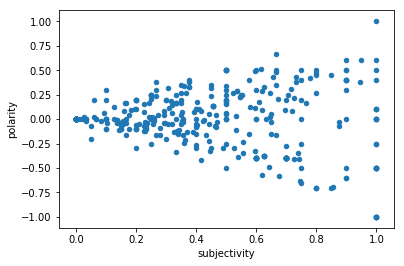

In [141]:
temp_df.plot.scatter(x='subjectivity',y='polarity')

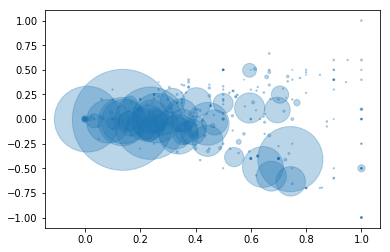

In [142]:
plt.scatter(temp_df.subjectivity,temp_df.polarity,temp_df.id,alpha = 0.3)

### ----------------------------------------------------------------------------------------------

In [9]:
df_RTs = df.loc[df.retweet_user_name.notna(),['user_name','retweet_user_name']]
df_RTs = df_RTs.groupby(['user_name','retweet_user_name']).agg({'retweet_user_name':'count'})
df_RTs = df_RTs.rename(columns={'retweet_user_name':'RT_count'})
df_RTs.reset_index(inplace=True)

In [6]:
df_RTs.sort_values('RT_count',ascending=False).head()

,user_name,retweet_user_name,RT_count
16557,MaryDram,60Minutes,12
6043,DMMConsult_bot,thehill,11
1200,AleInCali,60Minutes,11
22117,SWS_EDU,thehill,11
33829,dougRESISTance,60Minutes,10
